
>**Course No** : CSE4238

>**Course Title** : Soft Computing Lab

>**Assignment No** : 03

>**Submitted By**:  **`170104003`**  Dip Chowdhury   

---

# **Google Drive Connect & Navigate Directory**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/SC/Assignment_3

/content/drive/My Drive/SC/Assignment_3


# **Import Libraries**

In [3]:
import os, re, sys, pprint, string, math, time, copy
import warnings, random, helper, shutil, cv2
random.seed(5)
warnings.filterwarnings('ignore')
from datetime import datetime
import IPython.display as ipd
from IPython.display import IFrame, display, HTML


import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Plotting library
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline
plt.set_cmap('viridis')
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm

# Scientific and vector computation for python
import numpy as np
np.random.seed(5)


# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

from PIL import ImageFile, Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import KFold, cross_val_score, train_test_split, RepeatedStratifiedKFold, RepeatedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import  StackingCVRegressor



# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()
# from fastai.vision.all import *
# from fastbook import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torchsummary import summary
from torch.utils.data import Subset, DataLoader, ConcatDataset, Dataset




import librosa # for music and audio analysis
import librosa.display # for audio visualization
import soundfile as sf # librosa fails when reading files on Kaggle.

<Figure size 432x288 with 0 Axes>

In [16]:
#df.tail()
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

# Download/Import Dataset

In [ ]:
# Dataset Link https://drive.google.com/file/d/xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx/view
# Download
# !gdown --id xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# Unzip 
# !unzip "/content/drive/My Drive/xx.zip" -d "/content/drive/My Drive/"

In [4]:
dir_path = '/content/drive/My Drive/SC/Assignment_3/'

In [ ]:
df = pd.read_csv('Dataset 1.csv', encoding='ISO-8859-1')
df.head()

,message,label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# Pre-Processing

In [ ]:
df.drop(10313,inplace=True)
df.tail()

,message,label
10308,"Many sufferers of depression aren't sad; they feel nothing at all, or a persistent and nagging anxiety.",1
10309,"No Depression by G Herbo is my mood from now on, i'm done stressing over people that don't deserve it",1
10310,What do you do when depression succumbs the brain and makes you feel like you'll never be enough?,1
10311,"Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃÂ",1
10312,dont mistake a bad day with depression! everyone has 'em!,1


In [ ]:
import re
def remove(text):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)


def remove_username(text):
    return re.sub(r"(?:@[\w_]+)", "", text)

def remove_url(text):
    return re.sub(r"http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+", "", text)

def remove_numbers(text):
    return re.sub(r"(?:(?:\d+,?)+(?:\.?\d+)?)", "", text)

def remove_punctuation(text):
    return re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)

def remove_multiple_spaces(text):
    return re.sub(r" +", " ", text)

def remove_newline_lowercase(text):
    return re.sub(r"\n", " ", text).lower()

df['message'] = df['message'].apply(lambda x: remove_username(x))
df['message'] = df['message'].apply(lambda x: remove_url(x))
df['message'] = df['message'].apply(lambda x: remove_numbers(x))
df['message'] = df['message'].apply(lambda x: remove_punctuation(x))
df['message'] = df['message'].apply(lambda x: remove_multiple_spaces(x))
df['message'] = df['message'].apply(lambda x: remove_newline_lowercase(x))

In [ ]:
df.head()

,message,label
0,just had a real good moment i missssssssss him so much,0
1,is reading manga,0
2,,0
3,need to send 'em to my accountant tomorrow oddly i wasn't even referring to my taxes those are supporting evidence though,0
4,add me on myspace myspacecomlookthunder,0


In [ ]:
nan_value = float("NaN")
df.replace(" ", nan_value, inplace=True)
df.dropna(subset = ["message"], inplace=True)
df.head()

,message,label
0,just had a real good moment i missssssssss him so much,0
1,is reading manga,0
3,need to send 'em to my accountant tomorrow oddly i wasn't even referring to my taxes those are supporting evidence though,0
4,add me on myspace myspacecomlookthunder,0
5,so sleepy good times tonight though,0


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spacy_stopwords)]))

In [ ]:
df.tail()

,message,label
10308,sufferers depression aren't sad feel persistent nagging anxiety,1
10309,depression g herbo mood i'm stressing people don't deserve,1
10310,depression succumbs brain makes feel like you'll,1
10311,ketamine nasal spray shows promise depression suicide health ãâ,1
10312,dont mistake bad day depression 'em,1


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spacy_stopwords)]))
def lemmatize_text(text):
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            lemmatized.append(lemma)
    return " ".join(lemmatized)


df['message'] = df['message'].apply(lemmatize_text)

In [ ]:
df.head()

,message,label
0,real good moment missssssssss,0
1,reading manga,0
3,need send -PRON- accountant tomorrow oddly be not refer taxis support evidence,0
4,add myspace myspacecomlookthunder,0
5,sleepy good times tonight,0


In [ ]:
df = df.sample(frac = 1., random_state = 5).reset_index(drop = True)

In [ ]:
df.to_csv('Cleaned.csv',index=False)

In [10]:
data = pd.read_csv('Dataset 1.csv', skip_blank_lines=True, engine = 'python')
data = data.sample(frac = 1., random_state = 5).reset_index(drop = True)
print(data['label'].value_counts(0))

0    8000
1    2314
Name: label, dtype: int64


In [11]:
EPOCH = 10
split_val = int(0.2 * data.shape[0])
test = data.iloc[-split_val :]
val = data.iloc[- 2 * split_val : -split_val]
train = data.iloc[: - 2 * split_val]


print(train['label'].value_counts())
# train

print(val['label'].value_counts())
# validX

print(test['label'].value_counts())
# test

0    4800
1    1390
Name: label, dtype: int64
0    1595
1    467 
Name: label, dtype: int64
0    1605
1    457 
Name: label, dtype: int64


In [14]:
trainX = np.array(train.iloc[:, 0])
trainY = np.array(train.iloc[:, 1])
valX = np.array(val.iloc[:, 0])
valY = np.array(val.iloc[:, 1])
testX = np.array(test.iloc[:, 0])
testY = np.array(test.iloc[:, 1])


(6190,)
(6190,)
(2062,)
(2062,)
(2062,)
(2062,)


In [18]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 10000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(trainX)
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs)
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs)
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs)
print(train_seqs.shape)
print(val_seqs.shape)
print(test_seqs.shape)

(6190, 84)
(2062, 65)
(2062, 64)


In [19]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.SimpleRNN(256, return_sequences = True, dropout = 0.2))
model.add(layers.SimpleRNN(128, return_sequences = True, dropout = 0.2))
model.add(layers.SimpleRNN(64, return_sequences = True, dropout = 0.2))
model.add(layers.SimpleRNN(8, return_sequences = True, dropout = 0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2054656   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 256)         98560     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 128)         49280     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          12352     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 8)           584       
_________________________________________________________________
dense (Dense)                (None, None, 1)           9         
Total params: 2,215,441
Trainable params: 2,215,441
Non-trainable params: 0
______________________________________________

In [20]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

Epoch 1/10
194/194 [==============================] - 128s 624ms/step - loss: 0.5392 - accuracy: 0.7717 - val_loss: 0.5350 - val_accuracy: 0.7735
Epoch 2/10
194/194 [==============================] - 120s 618ms/step - loss: 0.5328 - accuracy: 0.7754 - val_loss: 0.5351 - val_accuracy: 0.7735
Epoch 3/10
194/194 [==============================] - 121s 625ms/step - loss: 0.5328 - accuracy: 0.7754 - val_loss: 0.5352 - val_accuracy: 0.7735
Epoch 4/10
194/194 [==============================] - 120s 617ms/step - loss: 0.5327 - accuracy: 0.7756 - val_loss: 0.5350 - val_accuracy: 0.7735
Epoch 5/10
194/194 [==============================] - 120s 618ms/step - loss: 0.5327 - accuracy: 0.7756 - val_loss: 0.5350 - val_accuracy: 0.7735
Epoch 6/10
194/194 [==============================] - 120s 619ms/step - loss: 0.5327 - accuracy: 0.7756 - val_loss: 0.5350 - val_accuracy: 0.7735
Epoch 7/10
194/194 [==============================] - 120s 618ms/step - loss: 0.5326 - accuracy: 0.7756 - val_loss: 0.5350 -

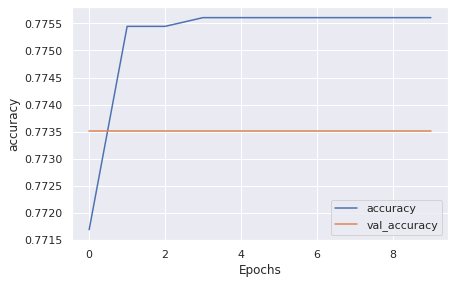

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

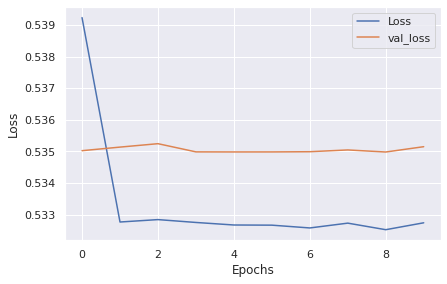

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "val_loss"])
plt.show()

In [44]:
y_pred = model.predict(val_seqs)
y_pred = (y_pred > 0.5)
len(y_pred)
len(valY)
loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

65/65 [==============================] - 2s 27ms/step - loss: 0.5351 - accuracy: 0.7735
Validation Loss: 0.5351473689079285
Validation Accuracy: 0.773520827293396


In [46]:
y_pred = model.predict(test_seqs)
y_pred = np.where(y_pred > 0.5)
loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

65/65 [==============================] - 2s 28ms/step - loss: 0.5284 - accuracy: 0.7789
Test Loss: 0.5283618569374084
Test Accuracy: 0.7788555026054382


In [42]:
valY.shape

(2062,)

In [40]:
y_pred = y_pred.reshape((y_pred.shape[0]*y_pred.shape[1]), y_pred.shape[2])
y_pred = y_pred.transpose()

In [41]:
y_pred.shape

(1, 134030)

In [29]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(valY, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(valY, y_pred).flatten()/np.sum(confusion_matrix(valY, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(valY, y_pred), annot=labels, fmt='', cmap='Blues')

ValueError: ignored

In [51]:
data = pd.read_csv('Cleaned.csv', skip_blank_lines=True, engine = 'python', dtype=str)
data = data.sample(frac = 1., random_state = 5).reset_index(drop = True)
print(data['label'].value_counts(0))


0    7983
1    2311
Name: label, dtype: int64


In [ ]:
data['message'].astype(str)
data['label'].astype(str)

In [57]:
EPOCH = 4
split_val = int(0.2 * data.shape[0])
test = data.iloc[-split_val :]
val = data.iloc[- 2 * split_val : -split_val]
train = data.iloc[: - 2 * split_val]
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())


0    4772
1    1406
Name: label, dtype: int64
0    1614
1    444 
Name: label, dtype: int64
0    1597
1    461 
Name: label, dtype: int64


In [58]:
trainX = np.array(train.iloc[:, 0])
trainY = np.array(train.iloc[:, 1])
valX = np.array(val.iloc[:, 0])
valY = np.array(val.iloc[:, 1])
testX = np.array(test.iloc[:, 0])
testY = np.array(test.iloc[:, 1])




print(trainX.shape)
print(trainY.shape)
# print(trainX)
# print(trainY)
print(valX.shape)
print(valY.shape)
# print(validX)
# print(validY)
print(testX.shape)
print(testY.shape)
# print(testX)
# print(testY)

(6178,)
(6178,)
(2058,)
(2058,)
(2058,)
(2058,)


In [60]:

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 10000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(trainX)
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs)
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs)
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs)
print(train_seqs.shape)
print(val_seqs.shape)
print(test_seqs.shape)

AttributeError: ignored